In [1]:
# %%
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import mne
import os
import numpy as np
import mne
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import models
import os
import numpy as np
import mne
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


2024-08-22 16:45:19.593644: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-22 16:45:19.593721: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 16:45:19.593748: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-22 16:45:19.601671: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.10/dist-packa

In [2]:
save_path = "/home/work/HCOH/motors/eeg_motor_files/dataset.npz"
npzfile = np.load(save_path)
npzfile['x_train'], npzfile['y_train'], npzfile['x_test'], npzfile['y_test']

(array([[[[-7.84914871e-01, -3.12788564e-01, -3.25288447e-01, ...,
            4.98895412e-01,  4.72596661e-01,  4.06862207e-01],
          [-1.07328452e+00, -6.33192452e-01, -8.07700643e-01, ...,
            2.36282639e-01,  3.59384689e-01,  2.02593222e-01],
          [-1.21955652e+00, -7.27886475e-01, -8.09174983e-01, ...,
            6.04534954e-04,  1.75543915e-01,  1.33676441e-02],
          ...,
          [-9.79011399e-01, -8.30765194e-01, -5.52932922e-01, ...,
            4.87030111e-01,  5.62409912e-01,  4.42979043e-01],
          [-1.45621037e+00, -1.03115996e+00, -7.05026529e-01, ...,
            1.90824462e-01,  1.05071324e-01,  5.71510482e-02],
          [-8.50021300e-01, -8.06068815e-01, -6.97111902e-01, ...,
            1.70977920e-01,  2.20715181e-01, -2.24763739e-02]]],
 
 
        [[[ 7.43026402e-03,  6.06999458e-01,  3.81843042e-01, ...,
           -8.01738086e-01, -6.98116498e-01, -1.09545472e+00],
          [-5.14261757e-02,  4.70197753e-01,  2.77595395e-01, ...,
  

In [3]:
X_train, y_train, X_test, y_test = npzfile['x_train'], npzfile['y_train'], npzfile['x_test'], npzfile['y_test']

In [4]:
X_train.shape

(8186, 1, 64, 640)

In [5]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [6]:
from sklearn.model_selection import train_test_split
validation_split=0.2
# 미리 데이터를 나눕니다.
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=validation_split, random_state=42)



In [15]:

n_timesteps,n_features,n_outputs= X_train_split.shape[1],X_train_split.shape[2],y_train_split.shape[1]
n_timesteps,n_features,n_outputs

(1, 64, 4)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Model initialization
model = Sequential()

# LSTM layers
model.add(LSTM(units=128, input_shape=(n_timesteps, n_features), activation='tanh', return_sequences=True))
model.add(LSTM(units=256, activation='tanh', return_sequences=True))
model.add(LSTM(units=128, activation='tanh', return_sequences=False))  # 마지막 LSTM 레이어는 return_sequences=False

# Dropout layer
model.add(Dropout(rate=0.5))

# Dense output layer
model.add(Dense(units=4, activation='softmax'))

# Model summary

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 1, 128)            98816     
                                                                 
 lstm_15 (LSTM)              (None, 1, 256)            394240    
                                                                 
 lstm_16 (LSTM)              (None, 128)               197120    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 690692 (2.63 MB)
Trainable params: 690692 (2.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout

# 모델 정의
model = Sequential()

# Conv1D 레이어
model.add(Conv1D(32, 3, activation='relu', input_shape=(64, 640)))  # (timesteps, features)
model.add(MaxPooling1D(pool_size=2))

# LSTM 레이어
model.add(LSTM(128, activation='tanh', return_sequences=True))
model.add(LSTM(128, activation='tanh',return_sequences=True))
model.add(LSTM(128, activation='tanh',return_sequences=True))
model.add(LSTM(128, activation='tanh'))


# Dense 레이어
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 클래스 수에 맞게 조정

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

# 모델 학습
history = model.fit(X_train.reshape(-1, 64, 640), y_train, batch_size=32, epochs=50, validation_data=(X_val.reshape(-1, 64, 640), y_val))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 62, 32)            61472     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 31, 32)            0         
 g1D)                                                            
                                                                 
 lstm_21 (LSTM)              (None, 31, 128)           82432     
                                                                 
 lstm_22 (LSTM)              (None, 31, 128)           131584    
                                                                 
 lstm_23 (LSTM)              (None, 31, 128)           131584    
                                                                 
 lstm_24 (LSTM)              (None, 128)               131584    
                                                     

256/256 [==============================] - 4s 16ms/step - loss: 0.1501 - accuracy: 0.9511 - val_loss: 0.0942 - val_accuracy: 0.9634
Epoch 47/50
256/256 [==============================] - 4s 16ms/step - loss: 0.1454 - accuracy: 0.9532 - val_loss: 0.0792 - val_accuracy: 0.9670
Epoch 48/50
256/256 [==============================] - 4s 16ms/step - loss: 0.1310 - accuracy: 0.9550 - val_loss: 0.0763 - val_accuracy: 0.9744
Epoch 49/50
256/256 [==============================] - 4s 15ms/step - loss: 0.1080 - accuracy: 0.9596 - val_loss: 0.0986 - val_accuracy: 0.9646
Epoch 50/50
256/256 [==============================] - 4s 15ms/step - loss: 0.1406 - accuracy: 0.9543 - val_loss: 0.0593 - val_accuracy: 0.9866


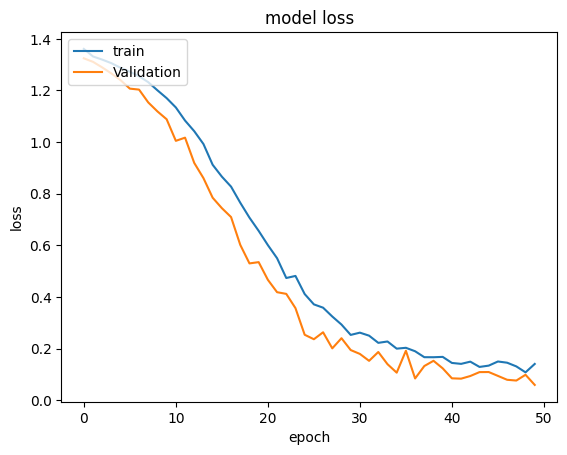

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

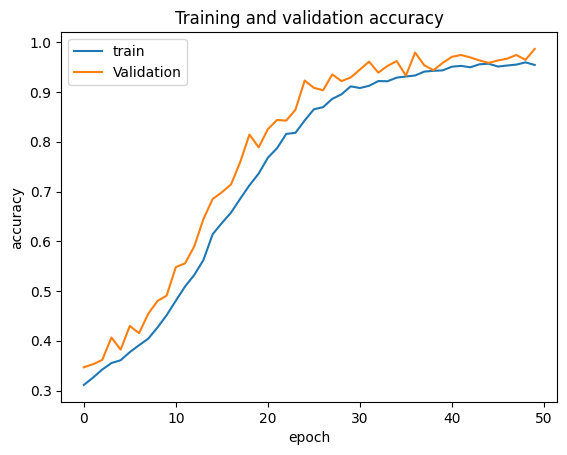

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [42]:
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test, axis=-1)

LABELS = ['Walking''Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2357, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_13" is incompatible with the layer: expected shape=(None, 64, 640), found shape=(None, 1, 64, 640)


In [43]:
# 예측할 때 입력 데이터의 차원을 변경합니다.
X_test_reshaped = X_test.reshape(-1, 64, 640)  # (None, 64, 640) 형태로 변경

# 예측 수행
y_pred = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis=-1)

y_true = np.argmax(y_test, axis=-1)

# 성능 평가
print(classification_report(y_true, y_pred))
print(f"Accuracy: {accuracy_score(y_true, y_pred)}")

29/29 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.44      0.40      0.42       227
           1       0.42      0.39      0.40       229
           2       0.36      0.41      0.38       228
           3       0.42      0.43      0.43       226

    accuracy                           0.41       910
   macro avg       0.41      0.41      0.41       910
weighted avg       0.41      0.41      0.41       910

Accuracy: 0.4076923076923077


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout

# 모델 정의
model = Sequential()

# LSTM 레이어
model.add(LSTM(128, activation='tanh', return_sequences=True,input_shape=(64, 640)))
model.add(LSTM(256, activation='tanh',return_sequences=True))
model.add(LSTM(256, activation='tanh',return_sequences=True))
model.add(LSTM(256, activation='tanh'))


# Dense 레이어
model.add(Dense(256, activation='tanh'))
model.add(Dense(256, activation='tanh'))

model.add(Dense(256, activation='tanh'))


model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 클래스 수에 맞게 조정
a
# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()



Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_41 (LSTM)              (None, 64, 128)           393728    
                                                                 
 lstm_42 (LSTM)              (None, 64, 256)           394240    
                                                                 
 lstm_43 (LSTM)              (None, 64, 256)           525312    
                                                                 
 lstm_44 (LSTM)              (None, 256)               525312    
                                                                 
 dense_29 (Dense)            (None, 256)               65792     
                                                                 
 dense_30 (Dense)            (None, 256)               65792     
                                                                 
 dense_31 (Dense)            (None, 256)             

In [53]:
history = model.fit(X_train.reshape(-1, 64, 640), y_train, batch_size=32, epochs=50, validation_data=(X_val.reshape(-1, 64, 640), y_val))

Epoch 1/50
256/256 [==============================] - 11s 27ms/step - loss: 1.3899 - accuracy: 0.2918 - val_loss: 1.3126 - val_accuracy: 0.3797
Epoch 2/50
256/256 [==============================] - 5s 21ms/step - loss: 1.3403 - accuracy: 0.3205 - val_loss: 1.2692 - val_accuracy: 0.4164
Epoch 3/50
256/256 [==============================] - 6s 22ms/step - loss: 1.2960 - accuracy: 0.3642 - val_loss: 1.2526 - val_accuracy: 0.4347
Epoch 4/50
256/256 [==============================] - 6s 22ms/step - loss: 1.2622 - accuracy: 0.3861 - val_loss: 1.1504 - val_accuracy: 0.4322
Epoch 5/50
256/256 [==============================] - 6s 22ms/step - loss: 1.2051 - accuracy: 0.4063 - val_loss: 1.0921 - val_accuracy: 0.5043
Epoch 6/50
256/256 [==============================] - 5s 21ms/step - loss: 1.1375 - accuracy: 0.4649 - val_loss: 0.9973 - val_accuracy: 0.5092
Epoch 7/50
256/256 [==============================] - 5s 21ms/step - loss: 1.0487 - accuracy: 0.5108 - val_loss: 0.8559 - val_accuracy: 0.632

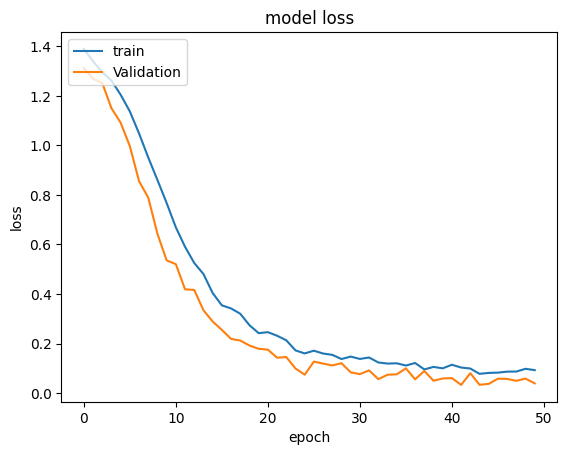

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

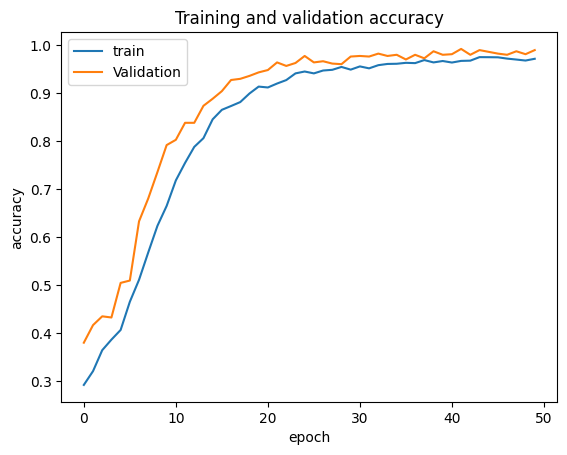

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [56]:
# 예측할 때 입력 데이터의 차원을 변경합니다.
X_test_reshaped = X_test.reshape(-1, 64, 640)  # (None, 64, 640) 형태로 변경

# 예측 수행
y_pred = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis=-1)

y_true = np.argmax(y_test, axis=-1)

# 성능 평가
print(classification_report(y_true, y_pred))
print(f"Accuracy: {accuracy_score(y_true, y_pred)}")

29/29 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0       0.36      0.29      0.32       227
           1       0.32      0.42      0.36       229
           2       0.29      0.27      0.28       228
           3       0.31      0.30      0.31       226

    accuracy                           0.32       910
   macro avg       0.32      0.32      0.32       910
weighted avg       0.32      0.32      0.32       910

Accuracy: 0.31978021978021975


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, GRU, Dense, Dropout

# 모델 정의
model = Sequential()

# GRU 레이어
model.add(GRU(128, activation='tanh', return_sequences=True, input_shape=(64, 640)))
model.add(GRU(256, activation='tanh', return_sequences=True))
model.add(GRU(256, activation='tanh', return_sequences=True))
model.add(GRU(256, activation='tanh'))

# Dense 레이어
model.add(Dense(256, activation='tanh'))
model.add(Dense(256, activation='tanh'))
model.add(Dense(256, activation='tanh'))

model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 클래스 수에 맞게 조정

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64, 128)           295680    
                                                                 
 gru_1 (GRU)                 (None, 64, 256)           296448    
                                                                 
 gru_2 (GRU)                 (None, 64, 256)           394752    
                                                                 
 gru_3 (GRU)                 (None, 256)               394752    
                                                                 
 dense_33 (Dense)            (None, 256)               65792     
                                                                 
 dense_34 (Dense)            (None, 256)               65792     
                                                                 
 dense_35 (Dense)            (None, 256)             

In [58]:
history = model.fit(X_train.reshape(-1, 64, 640), y_train, batch_size=16, epochs=50, validation_data=(X_val.reshape(-1, 64, 640), y_val))

Epoch 1/50
512/512 [==============================] - 17s 23ms/step - loss: 1.5486 - accuracy: 0.2747 - val_loss: 1.3487 - val_accuracy: 0.3370
Epoch 2/50
512/512 [==============================] - 10s 20ms/step - loss: 1.4501 - accuracy: 0.2940 - val_loss: 1.4009 - val_accuracy: 0.2967
Epoch 3/50
512/512 [==============================] - 10s 19ms/step - loss: 1.3700 - accuracy: 0.3232 - val_loss: 1.2900 - val_accuracy: 0.3700
Epoch 4/50
512/512 [==============================] - 11s 21ms/step - loss: 1.3306 - accuracy: 0.3596 - val_loss: 1.3039 - val_accuracy: 0.4103
Epoch 5/50
512/512 [==============================] - 11s 21ms/step - loss: 1.3222 - accuracy: 0.3752 - val_loss: 1.2517 - val_accuracy: 0.4322
Epoch 6/50
512/512 [==============================] - 10s 20ms/step - loss: 1.3002 - accuracy: 0.3987 - val_loss: 1.2082 - val_accuracy: 0.4420
Epoch 7/50
512/512 [==============================] - 11s 21ms/step - loss: 1.2628 - accuracy: 0.4278 - val_loss: 1.1815 - val_accuracy:

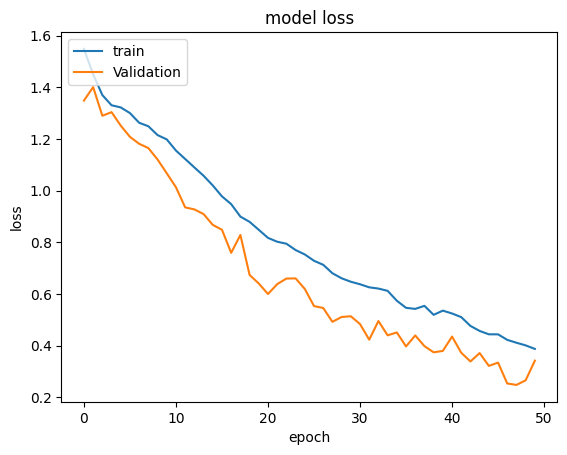

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

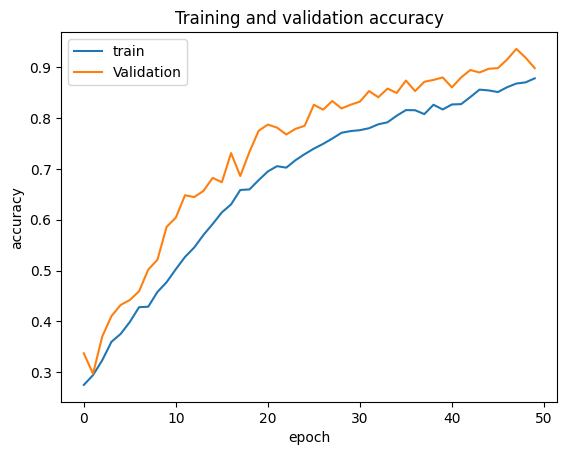

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [61]:
# 예측할 때 입력 데이터의 차원을 변경합니다.
X_test_reshaped = X_test.reshape(-1, 64, 640)  # (None, 64, 640) 형태로 변경

# 예측 수행
y_pred = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis=-1)

y_true = np.argmax(y_test, axis=-1)

# 성능 평가
print(classification_report(y_true, y_pred))
print(f"Accuracy: {accuracy_score(y_true, y_pred)}")

29/29 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

           0       0.31      0.45      0.37       227
           1       0.44      0.39      0.42       229
           2       0.30      0.33      0.32       228
           3       0.45      0.26      0.33       226

    accuracy                           0.36       910
   macro avg       0.38      0.36      0.36       910
weighted avg       0.38      0.36      0.36       910

Accuracy: 0.35934065934065934


In [66]:
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, DepthwiseConv2D, AveragePooling2D, Dropout, Activation, Add
from tensorflow.keras.constraints import max_norm

def eca_attention(input_feature, gama=2, b=1):
	in_channel = input_feature.shape[-1]
	kernel_size = int(abs((math.log(in_channel, 2) + b) / gama))
	if kernel_size % 2:
		kernel_size = kernel_size
	else:
		kernel_size = kernel_size + 1
	# [h,w,c]==>[None,c]
	x = GlobalAveragePooling2D()(input_feature)
	# [None,c]==>[c,1]
	x = Reshape(target_shape=(in_channel, 1))(x)
	# [c,1]==>[c,1]
	x = Conv1D(filters=1, kernel_size=kernel_size, padding='same', use_bias=False)(x)
	# sigmoid
	x = tf.nn.sigmoid(x)
	# [c,1]==>[1,1,c]
	x = Reshape((1, 1, in_channel))(x)
	outputs = multiply([input_feature, x])
	return outputs


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense, Permute
from tensorflow.keras.constraints import max_norm

# 변수 정의
Chans = 64  # EEG 채널 수
Samples = 640  # 각 채널에서 기록된 샘플 수
dropoutRate = 0.5  # Dropout 비율
nb_classes = 4  # 분류할 클래스 수

# 모델 정의
model = Sequential()

# 입력 레이어 및 Permute (채널과 샘플 차원을 바꿈)
model.add(Permute((2, 3, 1), input_shape=(1, Chans, Samples)))

# Conv2D 블록 1
model.add(Conv2D(25, (1, 5),
                 input_shape=(Chans, Samples, 1),
                 kernel_constraint=max_norm(2., axis=(0, 1, 2))))
model.add(Conv2D(25, (Chans, 1),
                 kernel_constraint=max_norm(2., axis=(0, 1, 2))))
model.add(BatchNormalization(epsilon=1e-05, momentum=0.9))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(1, 2), strides=(1, 2)))
model.add(Dropout(dropoutRate))

# Conv2D 블록 2
model.add(Conv2D(50, (1, 5),
                 kernel_constraint=max_norm(2., axis=(0, 1, 2))))
model.add(BatchNormalization(epsilon=1e-05, momentum=0.9))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(1, 2), strides=(1, 2)))
model.add(Dropout(dropoutRate))

# Conv2D 블록 3
model.add(Conv2D(100, (1, 5),
                 kernel_constraint=max_norm(2., axis=(0, 1, 2))))
model.add(BatchNormalization(epsilon=1e-05, momentum=0.9))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(1, 2), strides=(1, 2)))
model.add(Dropout(dropoutRate))

# Conv2D 블록 4
model.add(Conv2D(200, (1, 5),
                 kernel_constraint=max_norm(2., axis=(0, 1, 2))))
model.add(BatchNormalization(epsilon=1e-05, momentum=0.9))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(1, 2), strides=(1, 2)))
model.add(Dropout(dropoutRate))

# Flatten과 Dense 레이어 추가
model.add(Flatten())
model.add(Dense(nb_classes, kernel_constraint=max_norm(0.5)))
model.add(Activation('softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute_1 (Permute)         (None, 64, 640, 1)        0         
                                                                 
 conv2d (Conv2D)             (None, 64, 636, 25)       150       
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 636, 25)        40025     
                                                                 
 batch_normalization (Batch  (None, 1, 636, 25)        100       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 1, 636, 25)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 318, 25)        0         
 D)                                                   

In [74]:
# 입력 데이터의 차원을 맞추기 위해 reshape 사용
X_train = X_train.reshape(-1, 1, 64, 640)
X_val = X_val.reshape(-1, 1, 64, 640)
X_test = X_test.reshape(-1, 1, 64, 640)

# 모델 학습
history = model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
512/512 [==============================] - ETA: 0s - loss: 1.2666 - accuracy: 0.4592

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1893, in test_step
        y_pred = self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_25" is incompatible with the layer: expected shape=(None, 1, 64, 640), found shape=(None, 64, 640)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, Permute

model = Sequential()

# 입력 레이어 및 Permute
model.add(Permute((2, 3, 1), input_shape=(1, 64, 640)))

# Conv2D 블록 1
model.add(Conv2D(25, (1, 5), padding='same', kernel_constraint=max_norm(2., axis=(0, 1, 2))))
model.add(Conv2D(25, (1, 5), padding='same', kernel_constraint=max_norm(2., axis=(0, 1, 2))))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(1, 2), strides=(1, 2)))
model.add(Dropout(0.5))

# Conv2D 블록 2
model.add(Conv2D(50, (1, 5), padding='same', kernel_constraint=max_norm(2., axis=(0, 1, 2))))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(1, 2), strides=(1, 2)))
model.add(Dropout(0.5))

# Conv2D 블록 3
model.add(Conv2D(100, (1, 5), padding='same', kernel_constraint=max_norm(2., axis=(0, 1, 2))))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(1, 2), strides=(1, 2)))
model.add(Dropout(0.5))

# Conv2D 블록 4
model.add(Conv2D(200, (1, 5), padding='same', kernel_constraint=max_norm(2., axis=(0, 1, 2))))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(1, 2), strides=(1, 2)))
model.add(Dropout(0.5))

# Flatten 및 Dense 레이어
model.add(Flatten())
model.add(Dense(4, kernel_constraint=max_norm(0.5)))
model.add(Activation('softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute_2 (Permute)         (None, 64, 640, 1)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 640, 25)       150       
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 640, 25)       3150      
                                                                 
 batch_normalization_4 (Bat  (None, 64, 640, 25)       100       
 chNormalization)                                                
                                                                 
 activation_5 (Activation)   (None, 64, 640, 25)       0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 320, 25)       0         
 g2D)                                                 

In [10]:
X_train = X_train.reshape(-1, 1, 64, 640)
X_val = X_val.reshape(-1, 1, 64, 640)
X_test = X_test.reshape(-1, 1, 64, 640, 1)

# 모델 학습
history = model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_val, y_val))

# 예측
y_pred = model.predict(X_test)

Epoch 1/50


2024-08-22 16:46:06.379329: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:1021] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-08-22 16:46:06.797517: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-08-22 16:46:08.164755: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f05794d5b20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-22 16:46:08.164807: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2024-08-22 16:46:08.164817: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): CUDA GPU, Compute Capability 8.0
2024-08-22 16:46:08.170124: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env va

512/512 [==============================] - 20s 29ms/step - loss: 6.8906 - accuracy: 0.2965 - val_loss: 2.8123 - val_accuracy: 0.2821
Epoch 2/50
512/512 [==============================] - 10s 20ms/step - loss: 2.2102 - accuracy: 0.3082 - val_loss: 1.7871 - val_accuracy: 0.3181
Epoch 3/50
512/512 [==============================] - 10s 19ms/step - loss: 1.8178 - accuracy: 0.3199 - val_loss: 1.7191 - val_accuracy: 0.3309
Epoch 4/50
512/512 [==============================] - 10s 19ms/step - loss: 1.5666 - accuracy: 0.3179 - val_loss: 1.6164 - val_accuracy: 0.3303
Epoch 5/50
512/512 [==============================] - 10s 19ms/step - loss: 1.4962 - accuracy: 0.3374 - val_loss: 1.5626 - val_accuracy: 0.2735
Epoch 6/50
512/512 [==============================] - 10s 19ms/step - loss: 1.4763 - accuracy: 0.3240 - val_loss: 1.6460 - val_accuracy: 0.3126
Epoch 7/50
512/512 [==============================] - 10s 19ms/step - loss: 1.4466 - accuracy: 0.3340 - val_loss: 1.6110 - val_accuracy: 0.3107
Epo

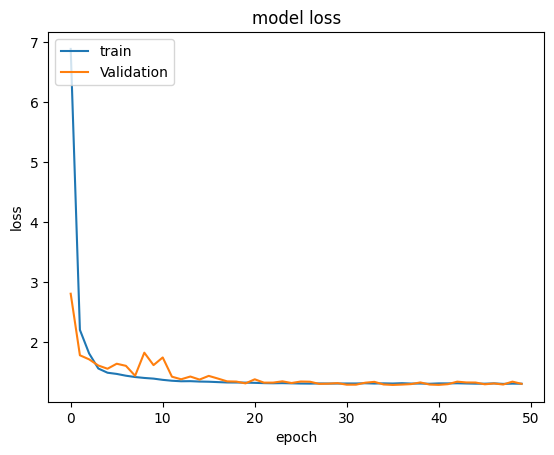

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

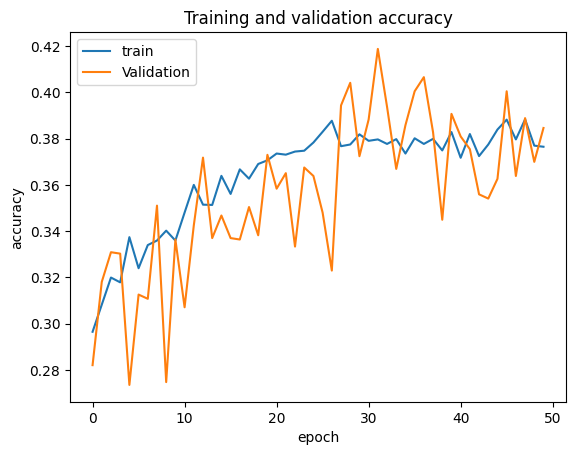

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')